In [1]:
# %pip install langfuse
# %pip install langchain langgraph langchain_openai langchain_community

import dotenv

dotenv.load_dotenv()

True

## Create Agent

Start by creating a StateGraph. A StateGraph object defines our chatbot's structure as a state machine. We will add nodes to represent the LLM and functions the chatbot can call, and edges to specify how the bot transitions between these functions.

In [2]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

llm = ChatOpenAI(model = "gpt-4o-mini", temperature = 0.2)

### define the langgraph

In [3]:

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

### Execute the graph

In [12]:
from langfuse.callback import CallbackHandler
from pprint import pprint

langfuse_handler = CallbackHandler()
for s in graph.stream({"messages": [HumanMessage(content = "how langgraph and langfuse work together?")]},
                      config={"callbacks": [langfuse_handler]}):
    pprint(s)

{'chatbot': {'messages': [AIMessage(content="LangGraph and LangFuse are tools designed to enhance the development and deployment of language models and applications that utilize natural language processing (NLP). While they serve different purposes, they can work together to create a more robust ecosystem for building language-based applications. Here's a brief overview of each and how they can complement each other:\n\n### LangGraph\n- **Purpose**: LangGraph is typically focused on providing a framework for building and managing language models and their interactions. It may offer features like model training, evaluation, and deployment, as well as tools for managing data and workflows related to language processing tasks.\n- **Functionality**: It may include capabilities for visualizing language model performance, managing datasets, and integrating various NLP components into a cohesive system.\n\n### LangFuse\n- **Purpose**: LangFuse is often geared towards enhancing the user experi

## Draw the Graph

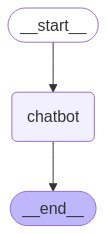

In [10]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)
